# Challenge

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017. The following information is available for each flight:

* Fecha-I: Scheduled date and time of the flight.
* Vlo-I : Scheduled flight number.
* Ori-I : Programmed origin city code.
* Des-I : Programmed destination city code.
* Emp-I : Scheduled flight airline code.
* Fecha-O : Date and time of flight operation.
* Vlo-O : Flight operation number of the flight.
* Ori-O : Operation origin city code
* Des-O : Operation destination city code.
* Emp-O : Airline code of the operated flight.
* DIA: Day of the month of flight operation.
* MES : Number of the month of operation of the flight.
* AÑO : Year of flight operation.
* DIANOM : Day of the week of flight operation.
* TIPOVUELO : Type of flight, I =International, N =National.
* OPERA : Name of the airline that operates.
* SIGLAORI: Name city of origin.
* SIGLADES: Destination city name.

## Question #1

How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime, time
from datetime import timedelta


# Load data
df = pd.read_csv('dataset_SCL.csv')
print(df.isna().sum())
# There is a NA in Vlo-O
df = df[df['Vlo-O'].notna()]

# 1. How is the data distributed?
# Show summary statistics for relevant columns
print(df[['Fecha-I', 'Fecha-O']].describe())


# Count number of unique values for categorical columns
for col in ['Ori-I', 'Des-I', 'Emp-I', 'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']:
    print(col + ':', df[col].nunique())

# Count number of flights by month and type of flight
print(df.groupby(['MES', 'TIPOVUELO'])['Vlo-I'].count())

# General description
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

/home/almendra/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64
                    Fecha-I              Fecha-O
count                 68205                68205
unique                53252                62774
top     2017-03-26 18:00:00  2017-11-05 14:51:00
freq                      6                    5
Ori-I: 1
Des-I: 64
Emp-I: 30
Ori-O: 1
Des-O: 63
Emp-O: 32
DIANOM: 7
TIPOVUELO: 2
OPERA: 23
SIGLAORI: 1
SIGLADES: 62
MES  TIPOVUELO
1    I            2804
     N            3303
2    I            2499
     N            3062
3    I            2496
     N            2986
4    I            2354
     N            2666
5    I            2428
     N            2812
6    I            2373
     N            2608
7    I            2865
     N            3127
8    I            2

In [54]:
#pd.set_option('display.max_columns', None)
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,min_diff,delay_15,high_season,period_day,Des-I_delay_class
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,3,0,1,night,clase_5
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,9,0,1,night,clase_5
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,9,0,1,night,clase_5
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,3,0,1,night,clase_5
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,-2,0,1,night,clase_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,46,1,1,afternoon,clase_6
68201,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,Lunes,I,JetSmart SPA,Santiago,Lima,16,1,1,afternoon,clase_6
68202,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,Miercoles,I,JetSmart SPA,Santiago,Lima,40,1,1,afternoon,clase_6
68203,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,13,0,1,afternoon,clase_6


There are 64 destinations,  2 types of flight, 23 different airlines. Almost all the data its from year 2017, with the exception of two flights. There are times when flights arrive earlier than expected, its something important to note.

## Question #2

Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:

* high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
* min_diff : difference in minutes between Date-O and Date-I .
* delay_15 : 1 if min_diff > 15, 0 if not.
* period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), basedonDate-I .

In [52]:
# 2. Generate additional columns
# Create min_diff column
def get_min_diff(row):
    fecha_i = datetime.strptime(row['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    fecha_o = datetime.strptime(row['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    if fecha_o < fecha_i:
        fecha_o += timedelta(days=1)
        diff =  fecha_i - fecha_o
        min_diff = -diff.seconds//60
    else: 
        fecha_o += timedelta(days=1)
        diff =  fecha_o - fecha_i
        min_diff = diff.seconds//60
    return min_diff

df['min_diff'] = df.apply(lambda row: get_min_diff(row), axis=1)

# Create delay_15 column
df['delay_15'] = (df['min_diff'] > 15).astype(int) 
# Convert Fecha-I and Fecha-O to datetime format
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')

# Create high_season colunum_classesnum_classesnum_classesnum_classesmn
df['high_season'] = ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | \
                    ((df['Fecha-I'].dt.month == 1) | (df['Fecha-I'].dt.month == 2) | (df['Fecha-I'].dt.month == 3)) | \
                    ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31)) | \
                    ((df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) & (df['Fecha-I'].dt.day <= 30))
df['high_season'] = df['high_season'].astype(int)


# Create period_day column
morning = range(5, 12)
afternoon = range(12, 19)
night = list(range(0, 5)) + list(range(19, 24))
df['period_day'] = df['Fecha-I'].apply(lambda x: 'morning' if x.time().hour in morning else \
                                                        ('afternoon' if x.time().hour in afternoon else 'night'))

# Export to CSV
df[['high_season', 'min_diff', 'delay_15', 'period_day']].to_csv('synthetic_features.csv', index=False)


In [4]:
## Visual exploratory analysis
import seaborn as sns 
import matplotlib.pyplot as plt
    
# Plot the distribution of flight types
sns.countplot(x='TIPOVUELO', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of high season
sns.countplot(x='high_season', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of period of the day
sns.countplot(x='period_day', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of flights by airline
sns.countplot(x='OPERA', data=df)
plt.title('Distribution of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of flights by airline
sns.countplot(x='DIANOM', data=df)
plt.title('Distribution of days of the week')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of delays
sns.histplot(x='min_diff', data=df, bins=50)
plt.title('Distribution of difference of minutes')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of the target variable
sns.histplot(data=df, x='delay_15', bins=2)
plt.title('Distribution of delay')
plt.xlabel('1 if min_diff > 15, 0 if not.')
plt.ylabel('Count')
plt.show()




Matplotlib created a temporary config/cache directory at /tmp/matplotlib-freofn6q because the default path (/home/almendra/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Question #3

What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

In [5]:
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(dest_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(airline_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(month_delay.sort_values(['MES'], ascending=[True]))

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(dayofweek.sort_values([('delay_15', 'count')], ascending=[False]))

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(season_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(flighttype_delay.sort_values([('delay_15', 'count')], ascending=[False]))

       delay_15          min_diff
           mean count        mean
Des-I                            
SCFA   0.146363  5787    7.023155
SPJC   0.230404  5269   11.737901
SCCF   0.122255  5145    5.970262
SCTE   0.168465  4357    8.868028
SCIE   0.156446  3995    8.392240
...         ...   ...         ...
SARI   0.000000     1   -2.000000
SBFI   0.000000     1    5.000000
SLCB   1.000000     1  113.000000
SEQM   1.000000     1   24.000000
SEQU   1.000000     1   80.000000

[64 rows x 3 columns]
                          delay_15          min_diff
                              mean  count       mean
OPERA                                               
Grupo LATAM               0.178666  40892   9.470630
Sky Airline               0.177647  14298   8.117149
Aerolineas Argentinas     0.240123   1949  10.004618
Copa Air                  0.062703   1850   0.214054
Latin American Wings      0.407053   1673  24.579199
Avianca                   0.265625   1152  11.131944
JetSmart SPA            

In [6]:
# without min_diff and count
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': 'mean'})

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': 'mean'})

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': 'mean'})

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': 'mean'})

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': 'mean'})

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': 'mean'})


<bound method Axes.set_title of <AxesSubplot:xlabel='TIPOVUELO'>>

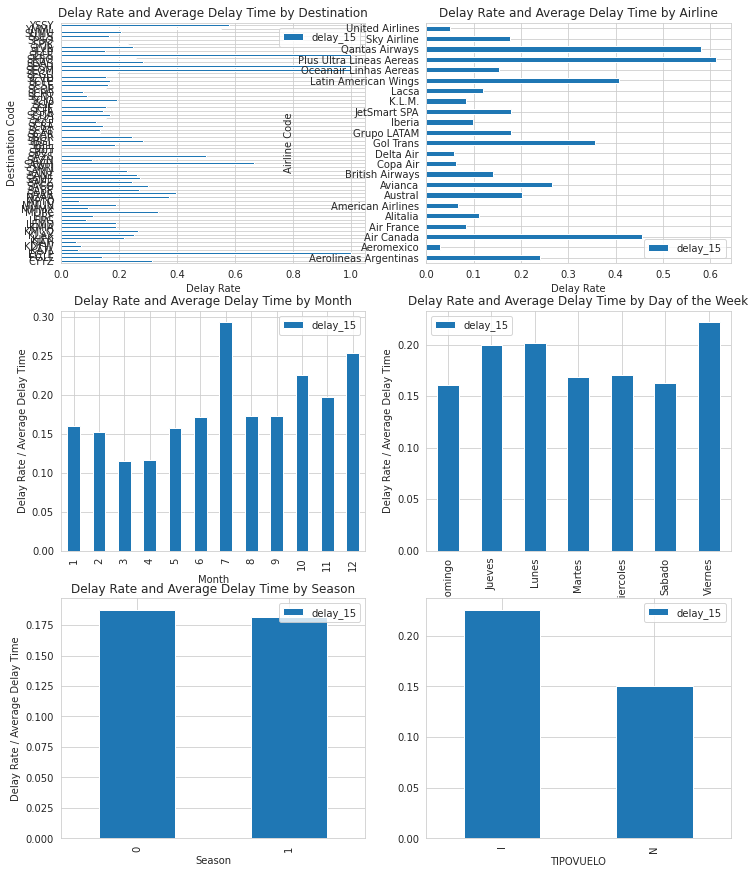

In [7]:
# Plot the delay rate and average delay time by destination, airline, month, day of the week, season, and type of flight
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

dest_delay.plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('Delay Rate and Average Delay Time by Destination')
axes[0, 0].set_xlabel('Delay Rate')
axes[0, 0].set_ylabel('Destination Code')

airline_delay.plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('Delay Rate and Average Delay Time by Airline')
axes[0, 1].set_xlabel('Delay Rate')
axes[0, 1].set_ylabel('Airline Code')

month_delay.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Delay Rate and Average Delay Time by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Delay Rate / Average Delay Time')

dayofweek.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Delay Rate and Average Delay Time by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Delay Rate / Average Delay Time')

season_delay.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Delay Rate and Average Delay Time by Season')
axes[2, 0].set_xlabel('Season')
axes[2, 0].set_ylabel('Delay Rate / Average Delay Time')

flighttype_delay.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title

Based on the exploratory analysis, we can observe the following behavior of delay rate across different variables:

* Destination: Flights departing to some specific destinations have a higher likelihood of getting delayed. 

* Airline: Different airlines have different delay rates. For example, Latin American Wings has a relatively higher delay rate as compared to other airlines.

* Month of the year: The delay rate is relatively higher in some specific months such as July, October and December.

* Day of the week: The delay rate is relatively higher on some specific days such as Fridays.

* Season: The delay rate is almost the same on both cases.

* Type of flight: International flights have a relatively higher delay rate as compared to national flights.

In [21]:
quantile_33 = df.groupby(['Des-I']).sum()[['delay_15']].sort_values(by='delay_15', ascending=False).delay_15.quantile(0.33)
quantile_66 = df.groupby(['Des-I']).sum()[['delay_15']].sort_values(by='delay_15', ascending=False).delay_15.quantile(0.66)

df_tmp = df.groupby(['Des-I']).sum()[['delay_15']].sort_values(by='delay_15', ascending=False).reset_index()
df_tmp.loc[(df_tmp.delay_15 >= quantile_66),'des_i_delay_class'] = 'alta'
df_tmp.loc[(df_tmp.delay_15 < quantile_66) & (df_tmp.delay_15 >= quantile_33),'des_i_delay_class'] = 'media'
df_tmp.loc[(df_tmp.delay_15 < quantile_33),'des_i_delay_class'] = 'baja'

df = df.merge(df_tmp[['Des-I','des_i_delay_class']], on=['Des-I'], how='left')
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,min_diff,delay_15,high_season,period_day,des_i_delay_class
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,3,0,1,night,alta
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,9,0,1,night,alta
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,9,0,1,night,alta
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,3,0,1,night,alta
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,-2,0,1,night,alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,46,1,1,afternoon,alta
68201,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,Lunes,I,JetSmart SPA,Santiago,Lima,16,1,1,afternoon,alta
68202,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,Miercoles,I,JetSmart SPA,Santiago,Lima,40,1,1,afternoon,alta
68203,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,13,0,1,afternoon,alta


<AxesSubplot:xlabel='prp_delay', ylabel='Count'>

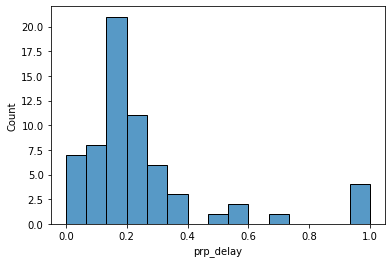

In [41]:
tmp = df.groupby(['Des-I']).agg({'delay_15':'sum','Fecha-I':'count'}).rename(columns={'Fecha-I':'count_des_i'})
tmp['prp_delay'] = tmp.delay_15/tmp.count_des_i
tmp = tmp.sort_values(by='prp_delay', ascending=False).reset_index()

import seaborn as sns
sns.histplot(tmp.prp_delay)

Revisamos la distribucion de valores para prp_delay (proporción de vuelos con delay para cada Des-I) y reemplazamos outliers (estos serian los mayores al 40%) por el valor del promedio de prp_delay del resto de los datos. Luego, creamos una variable categórica para clasificar los destinos dentro de 10 cuantiles de proporción de retrasos.

,Des-I,delay_15,count_des_i,prp_delay
0,EGYP,1,1,0.176887
1,SLCB,1,1,0.176887
2,SEQU,1,1,0.176887
3,SEQM,1,1,0.176887
4,SAWH,4,6,0.176887
...,...,...,...,...
59,KIAH,17,335,0.050746
60,SBCT,0,3,0.000000
61,SARI,0,1,0.000000
62,SPSO,0,1,0.000000


68205
68205


<AxesSubplot:xlabel='prp_delay', ylabel='Count'>

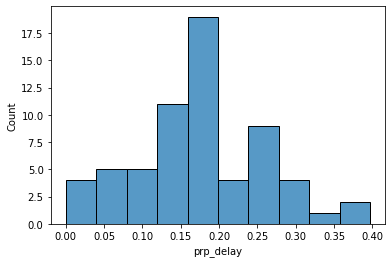

In [50]:
# Creamos la clasificación de los 10 cuantiles
mean_to_replace = tmp[tmp.prp_delay<=0.4].prp_delay.mean()
tmp.loc[tmp.prp_delay>0.4,'prp_delay'] = mean_to_replace
display(tmp)
print(tmp.count_des_i.sum())
print(len(df))
sns.histplot(tmp.prp_delay, bins=10)

Vemos que con esto sólo reemplzamos prp_delay de 7 destinos de 63, lo cual equivale a 245 valores reemplazados

In [39]:
tmp.count_des_i.sum().

67960

In [48]:
tmp[tmp['Des-I']=='KMIA']

,Des-I,delay_15,count_des_i,prp_delay
33,KMIA,193,1015,0.190148


In [53]:
def create_delay_class(df, col, n_classes):
    #
    tmp = df.groupby(['Des-I']).agg({'delay_15':'sum','Fecha-I':'count'}).rename(columns={'Fecha-I':'count_des_i'})
    tmp['prp_delay'] = tmp.delay_15/tmp.count_des_i
    tmp = tmp.sort_values(by='prp_delay', ascending=False).reset_index()
    mean_to_replace = tmp[tmp.prp_delay<=0.4].prp_delay.mean()
    tmp.loc[tmp.prp_delay>0.4,'prp_delay'] = mean_to_replace
    # We use the cut function to go from contiuous to categorical values (10 classes for this example)
    labels = ['clase_' + str(i) for i in range(n_classes + 1)]
    tmp['{}_delay_class'.format(col)] = pd.cut(tmp['prp_delay'], bins=n_classes + 1, labels=labels)
    df = df.merge(tmp[[col, '{}_delay_class'.format(col)]], on=[col], how='left')
    return df

df = create_delay_class(df, 'Des-I', 10)
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,min_diff,delay_15,high_season,period_day,Des-I_delay_class
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,3,0,1,night,clase_5
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,9,0,1,night,clase_5
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,9,0,1,night,clase_5
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,3,0,1,night,clase_5
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,-2,0,1,night,clase_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,46,1,1,afternoon,clase_6
68201,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,Lunes,I,JetSmart SPA,Santiago,Lima,16,1,1,afternoon,clase_6
68202,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,Miercoles,I,JetSmart SPA,Santiago,Lima,40,1,1,afternoon,clase_6
68203,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,13,0,1,afternoon,clase_6


## Question #4

Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
warnings.filterwarnings('ignore')

# New variables
# ....

# Define features and target variable
df = df.drop(['Fecha-I', 'Fecha-O', 'Vlo-I', 'Vlo-O', 'DIA', 'Ori-I', 'Ori-O', 'SIGLAORI', 'SIGLADES', 'Des-I', 'Des-O', 'Emp-O', 'AÑO'], axis=1)
df['MES'] = df['MES'].astype(str)
df['Des-I_delay_class'] = df['Des-I_delay_class'].astype(str)
string_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=string_columns)

# Split the dataset into X (features) and y (target variable)
X = df.drop(['delay_15', 'min_diff'], axis=1)
y = df['delay_15']
df = df.loc[:,~df.columns.duplicated()].copy()

# Balance the target variable using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.values, y.ravel())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model with cross-validation
lr_model = LogisticRegression(random_state=42)
lr_scores = cross_validate(lr_model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'roc_auc'], return_train_score=True)
lr_model.fit(X_train, y_train)

# Train random forest model with cross-validation
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_validate(rf_model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'roc_auc'], return_train_score=True)
rf_model.fit(X_train, y_train)

# Train XGBoost model with cross-validation
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_scores = cross_validate(xgb_model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'roc_auc'], return_train_score=True)
xgb_model.fit(X_train, y_train)

print(xgb_scores)

# Make predictions on test set
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate model performance
lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds)
lr_rec = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
lr_roc = roc_auc_score(y_test, lr_preds)

rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_roc = roc_auc_score(y_test, rf_preds)

xgb_acc = accuracy_score(y_test, rf_preds)
xgb_prec = precision_score(y_test, rf_preds)
xgb_rec = recall_score(y_test, rf_preds)
xgb_f1 = f1_score(y_test, rf_preds)
xgb_roc = roc_auc_score(y_test, xgb_preds)

# Logistic regression performance
print("Logistic Regression Model:")
print(f"Accuracy: {lr_acc}")
print(f"Precision: {lr_prec}")
print(f"Recall: {lr_rec}")
print(f"F1-score: {lr_f1}")
print(f"ROC: {lr_roc}")

# Random Forest performance
print("\nRandom Forest Model:")
print(f"Accuracy: {rf_acc}")
print(f"Precision: {rf_prec}")
print(f"Recall: {rf_rec}")
print(f"F1-score: {rf_f1}")
print(f"ROC: {rf_roc}")

# XGBoost performance
print("\nXGBoost Model:")
print(f"Accuracy: {rf_acc}")
print(f"Precision: {rf_prec}")
print(f"Recall: {rf_rec}")
print(f"F1-score: {rf_f1}")
print(f"ROC: {xgb_roc}")


/home/almendra/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/almendra/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Nos interesa minimizar la cantidad de falsos positivos, debido a que el costo de adaptar la operación debido a un falso retraso es alto, ya que podría tener implcancias como re agendar vuelos, problemas logistísticos con los aeropuertos, etc...

Dado lo anterior, se debería utilizar la métrica de precision para realizar la optimización de hiperparámetros, ya que al maximizar esta métrica, reducimos al mínimo la cantidad de falsos positivos, logrando ahorros en costos operacionales.

*inserte foto/formula de la definicion de precision*

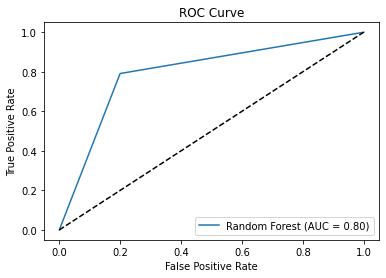

In [17]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_preds)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, rf_preds)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
pd.set_option('max_row', None)
pd.DataFrame([X.columns,rf_model.feature_importances_]).T.sort_values(by=1, ascending=False)

,0,1
0,high_season,0.0467616
43,DIANOM_Domingo,0.0437082
46,DIANOM_Martes,0.0427394
45,DIANOM_Lunes,0.0401261
76,period_day_morning,0.0395264
44,DIANOM_Jueves,0.0385287
47,DIANOM_Miercoles,0.037528
49,DIANOM_Viernes,0.0374015
48,DIANOM_Sabado,0.0367578
40,MES_7,0.0343985


In [28]:
X

DIA  MES   AÑO  high_season  Vlo-I_4  Vlo-I_6  Vlo-I_8  Vlo-I_10  \
0        1    1  2017            1        0        0        0         0   
1        2    1  2017            1        0        0        0         0   
2        3    1  2017            1        0        0        0         0   
3        4    1  2017            1        0        0        0         0   
4        5    1  2017            1        0        0        0         0   
...    ...  ...   ...          ...      ...      ...      ...       ...   
68201   22   12  2017            1        0        0        0         0   
68202   25   12  2017            1        0        0        0         0   
68203   27   12  2017            1        0        0        0         0   
68204   29   12  2017            1        0        0        0         0   
68205   31   12  2017            1        0        0        0         0   

       Vlo-I_26  Vlo-I_32  Vlo-I_33  Vlo-I_43  Vlo-I_50  Vlo-I_52  Vlo-I_54  \
0             0         0         0         0         0         0         0   
1             0         0         0         0         0         0         0   
2             0         0         0         0         0         0         0   
3             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
68201         0         0         0         0         0         0         0   
68202         0         0         0         0         0         0         0   
68203         0         0         0         0         0         0         0   
68204         0         0         0         0         0         0         0   
68205         0         0         0         0         0         0         0   

       Vlo-I_86  Vlo-I_88  Vlo-I_110  Vlo-I_112  Vlo-I_200  Vlo-I_201  \
0             0         0          0          0          0          0   
1             0         0          0          0          0          0   
2             0         0          0          0          0          0   
3             0         0          0          0          0          0   
4             0         0          0          0          0          0   
...         ...       ...        ...        ...        ...        ...   
68201         0         0          0          0          0          0   
68202         0         0          0          0          0          0   
68203         0         0          0          0          0          0   
68204         0         0          0          0          0          0   
68205         0         0          0          0          0          0   

       Vlo-I_202  Vlo-I_203  Vlo-I_207  Vlo-I_251  Vlo-I_253  Vlo-I_255  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
68201          0          0          0          0          0          0   
68202          0          0          0          0          0          0   
68203          0          0          0          0          0          0   
68204          0          0          0          0          0          0   
68205          0          0          0          0          0          0   

       Vlo-I_265  Vlo-I_267  Vlo-I_269  Vlo-I_271  Vlo-I_273  Vlo-I_275  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4   